## Get movie info box(store in Python dictionary)
#### Import necessary libraries

In [14]:
from bs4 import BeautifulSoup as bs
import requests

#### Load the webpage

In [15]:
r = requests.get("https://en.wikipedia.org/wiki/Toy_Story_3")

#Convert to a beautiful soup object
soup = bs(r.content)

#Print out the html
content = soup.prettify()
print(content)

<!DOCTYPE html>
<html class="client-nojs" dir="ltr" lang="en">
 <head>
  <meta charset="utf-8"/>
  <title>
   Toy Story 3 - Wikipedia
  </title>
  <script>
   document.documentElement.className="client-js";RLCONF={"wgBreakFrames":false,"wgSeparatorTransformTable":["",""],"wgDigitTransformTable":["",""],"wgDefaultDateFormat":"dmy","wgMonthNames":["","January","February","March","April","May","June","July","August","September","October","November","December"],"wgRequestId":"af7d469b-ac9f-4215-977b-35c6f913d157","wgCSPNonce":false,"wgCanonicalNamespace":"","wgCanonicalSpecialPageName":false,"wgNamespaceNumber":0,"wgPageName":"Toy_Story_3","wgTitle":"Toy Story 3","wgCurRevisionId":1058544274,"wgRevisionId":1058544274,"wgArticleId":1213838,"wgIsArticle":true,"wgIsRedirect":false,"wgAction":"view","wgUserName":null,"wgUserGroups":["*"],"wgCategories":["Articles with short description","Short description matches Wikidata","Good articles","Wikipedia indefinitely semi-protected pages","Use Amer

#### Grab only the toy story 3 movie info box

In [16]:
info_box = soup.find(class_="infobox vevent")
#print(info_box.prettify())
info_box_rows = info_box.find_all("tr")
for row in info_box_rows:
    print(row.prettify())

<tr>
 <th class="infobox-above summary" colspan="2" style="font-size: 125%; font-style: italic;">
  Toy Story 3
 </th>
</tr>

<tr>
 <td class="infobox-image" colspan="2">
  <a class="image" href="/wiki/File:Toy_Story_3_poster.jpg" title="All of the toys packed close together, holding up a large numeral '3', with Buzz, who is putting a friendly arm around Woody's shoulder, and Woody holding the top of the 3.">
   <img alt="All of the toys packed close together, holding up a large numeral '3', with Buzz, who is putting a friendly arm around Woody's shoulder, and Woody holding the top of the 3." class="thumbborder" data-file-height="326" data-file-width="220" decoding="async" height="326" src="//upload.wikimedia.org/wikipedia/en/6/69/Toy_Story_3_poster.jpg" width="220"/>
  </a>
  <div class="infobox-caption">
   Theatrical release poster
  </div>
 </td>
</tr>

<tr>
 <th class="infobox-label" scope="row" style="white-space: nowrap; padding-right: 0.65em;">
  Directed by
 </th>
 <td class="

#### Toy story 3 movie data cleanup


In [17]:
def get_content_value(row_data):
    if row_data.find("li"):
        return [li.get_text(" ", strip=True).replace("\xa0", " ") for li in row_data.find_all("li")]
    else:
        return row_data.get_text(" ", strip=True).replace("\xa0", " ")

movie_info = {}
for index, row in enumerate(info_box_rows): #enumerate allow us to get both the index and the row at the same time
    if index == 0:
        movie_info['title'] = row.find('th').get_text(" ", strip=True)
    elif index == 1:
        continue
    else:
        content_key = row.find("th").get_text(" ", strip=True)
        content_value = get_content_value(row.find("td"))
        movie_info[content_key] = content_value
        
movie_info         

{'title': 'Toy Story 3',
 'Directed by': 'Lee Unkrich',
 'Screenplay by': 'Michael Arndt',
 'Story by': ['John Lasseter', 'Andrew Stanton', 'Lee Unkrich'],
 'Produced by': 'Darla K. Anderson',
 'Starring': ['Tom Hanks',
  'Tim Allen',
  'Joan Cusack',
  'Don Rickles',
  'Wallace Shawn',
  'John Ratzenberger',
  'Estelle Harris',
  'Ned Beatty',
  'Michael Keaton',
  'Jodi Benson',
  'John Morris'],
 'Cinematography': ['Jeremy Lasky', 'Kim White'],
 'Edited by': 'Ken Schretzmann',
 'Music by': 'Randy Newman',
 'Production companies': ['Walt Disney Pictures', 'Pixar Animation Studios'],
 'Distributed by': 'Walt Disney Studios Motion Pictures',
 'Release date': ['June 12, 2010 ( 2010-06-12 ) ( Taormina Film Fest )',
  'June 18, 2010 ( 2010-06-18 ) (United States)'],
 'Running time': '103 minutes [1]',
 'Country': 'United States',
 'Language': 'English',
 'Budget': '$200 million [1]',
 'Box office': '$1.067 billion [1]'}

## Task 2: Get info Box for all movie

In [18]:
r = requests.get("https://en.wikipedia.org/wiki/List_of_Walt_Disney_Pictures_films")

#convert to a beautiful soup object
soup = bs(r.content)

#print out the html
content = soup.prettify()
print(content)

<!DOCTYPE html>
<html class="client-nojs" dir="ltr" lang="en">
 <head>
  <meta charset="utf-8"/>
  <title>
   List of Walt Disney Pictures films - Wikipedia
  </title>
  <script>
   document.documentElement.className="client-js";RLCONF={"wgBreakFrames":false,"wgSeparatorTransformTable":["",""],"wgDigitTransformTable":["",""],"wgDefaultDateFormat":"dmy","wgMonthNames":["","January","February","March","April","May","June","July","August","September","October","November","December"],"wgRequestId":"2d69e8a4-c854-4ecb-9193-a232271c8400","wgCSPNonce":false,"wgCanonicalNamespace":"","wgCanonicalSpecialPageName":false,"wgNamespaceNumber":0,"wgPageName":"List_of_Walt_Disney_Pictures_films","wgTitle":"List of Walt Disney Pictures films","wgCurRevisionId":1058585130,"wgRevisionId":1058585130,"wgArticleId":1970335,"wgIsArticle":true,"wgIsRedirect":false,"wgAction":"view","wgUserName":null,"wgUserGroups":["*"],"wgCategories":["Webarchive template wayback links","Articles with short description","Sh

In [19]:
movies = soup.select(".wikitable.sortable i")
movies[0:10]
movies[0]
#movies[0].a['href']
#movies[0].a['title']

<i><a href="/wiki/Academy_Award_Review_of_Walt_Disney_Cartoons" title="Academy Award Review of Walt Disney Cartoons">Academy Award Review of Walt Disney Cartoons</a></i>

In [20]:
def get_content_value(row_data):
    if row_data.find("li"):
        return [li.get_text(" ", strip=True).replace("\xa0", " ") for li in row_data.find_all("li")]
    elif row_data.find("br"):
        return [text for text in row_data.stripped_strings]
    else:
        return row_data.get_text(" ", strip=True).replace("\xa0", " ")
    
#Clean up references (remove[1][2], tags etc.)
def clean_tags(soup):
    for tag in soup.find_all(["sup", "span"]):
        tag.decompose()    
    
    
def get_info_box(url):    
    r = requests.get(url)
    soup = bs(r.content)
    info_box = soup.find(class_="infobox vevent")
    info_box_rows = info_box.find_all("tr")
    
    clean_tags(soup)
    
    movie_info = {}
    for index, row in enumerate(info_box_rows): #enumerate allow us to get both the index and the row at the same time
        if index == 0:
            movie_info['title'] = row.find('th').get_text(" ", strip=True)
        else:
            header = row.find('th')
            if header:
                content_key = row.find("th").get_text(" ", strip=True)
                content_value = get_content_value(row.find("td"))
                movie_info[content_key] = content_value
    return movie_info  


In [21]:
get_info_box("https://en.wikipedia.org/wiki/One_Little_Indian_(film)")

{'title': 'One Little Indian',
 'Directed by': 'Bernard McEveety',
 'Written by': 'Harry Spalding',
 'Produced by': 'Winston Hibler',
 'Starring': ['James Garner',
  'Vera Miles',
  'Pat Hingle',
  'Morgan Woodward',
  'Jodie Foster'],
 'Cinematography': 'Charles F. Wheeler',
 'Edited by': 'Robert Stafford',
 'Music by': 'Jerry Goldsmith',
 'Production company': 'Walt Disney Productions',
 'Distributed by': 'Buena Vista Distribution',
 'Release date': ['June 20, 1973'],
 'Running time': '90 Minutes',
 'Country': 'United States',
 'Language': 'English',
 'Box office': '$2 million'}

In [22]:
r = requests.get("https://en.wikipedia.org/wiki/List_of_Walt_Disney_Pictures_films")
soup = bs(r.content)
movies = soup.select(".wikitable.sortable i a")

base_path = "https://www.wikipedia.org/"

movie_info_list = []
for index, movie in enumerate(movies):
    if index % 10 == 0:
        print(index)
    try:
        relative_path = movie['href']
        full_path = base_path + relative_path
        title = movie['title']
        
        movie_info_list.append(get_info_box(full_path))
        
    except Exception as e:
        print(movie.get_text())
        print(e)


0
10
20
30
40
Zorro the Avenger
'NoneType' object has no attribute 'find'
The Sign of Zorro
'NoneType' object has no attribute 'find'
50
60
70
80
90
100
110
120
True-Life Adventures
'NoneType' object has no attribute 'find_all'
130
140
The London Connection
'NoneType' object has no attribute 'find'
150
160
170
180
190
200
210
220
230
240
250
260
270
280
290
300
310
320
330
340
350
360
370
380
390
400
410
420
430
440
450
460
470
480
490
500
Sister Act 3
'NoneType' object has no attribute 'find'
Tower of Terror
'NoneType' object has no attribute 'find_all'
Tron: Ares
'NoneType' object has no attribute 'find'
61
'NoneType' object has no attribute 'find_all'
510
Keeper of the Lost Cities
'NoneType' object has no attribute 'find_all'
Muppet Man
'NoneType' object has no attribute 'find_all'
520
Grimm
'NoneType' object has no attribute 'find_all'
The Paper Magician
'NoneType' object has no attribute 'find_all'
The Thief
'NoneType' object has no attribute 'find_all'
Tom Sawyer
'NoneType' objec

In [23]:
len(movie_info_list)

513

#### Save/Reload movie data

In [24]:
import json

def save_data(title, data):
    with open(title, 'w', encoding="utf-8") as f:
        json.dump(data, f, ensure_ascii=False, indent=2)

In [25]:
import json

def load_data(title):
    with open(title, encoding="utf-8") as f:
        return json.load(f)

In [54]:
save_data("disney_data_cleaned.json", movie_info_list)

#### Task #3: Clean the Data            

In [26]:
movie_info_list = load_data("disney_data_cleaned.json")

#### Clean our data
- ~~Clean up referneces [1]~~
- ~~Convert running time into an integer~~
- Convert dates into datetime object
- ~~Split up the long strings~~
- ~~Convert budget and Box office to numbers~~



In [29]:
#Convert running time into an integer
movie_info_list[-11]

{'title': 'Bambi',
 'Directed by': ['Supervising director',
  'David Hand',
  'Sequence directors',
  'James Algar',
  'Samuel Armstrong',
  'Graham Heid',
  'Bill Roberts',
  'Paul Satterfield',
  'Norman Wright'],
 'Story by': ['Story direction',
  'Perce Pearce',
  'Story adaptation',
  'Larry Morey',
  'Story development',
  'Vernon Stallings',
  'Melvin Shaw',
  'Carl Fallberg',
  'Chuck Couch',
  'Ralph Wright'],
 'Based on': ['Bambi, a Life in the Woods', 'by', 'Felix Salten'],
 'Produced by': 'Walt Disney',
 'Starring': 'see below',
 'Music by': ['Frank Churchill', 'Edward H. Plumb'],
 'Production company': 'Walt Disney Productions',
 'Distributed by': 'RKO Radio Pictures',
 'Release date': ['August 9, 1942 (World Premiere – London)',
  'August 13, 1942 (Premiere – New York City)',
  'August 21, 1942 (U.S.)'],
 'Running time': '70 minutes',
 'Country': 'United States',
 'Language': 'English',
 'Budget': '$858,000',
 'Box office': '$267.4 million'}

In [30]:
print([movie.get("Running time", "N/A") for movie in movie_info_list])

['41 minutes (74 minutes 1966 release)', '83 minutes', '88 minutes', '126 minutes', '74 minutes', '64 minutes', '70 minutes', '42 minutes', '70 min', '71 minutes', '75 minutes', '94 minutes', '73 minutes', '75 minutes', '82 minutes', '68 minutes', '74 minutes', '96 minutes', '75 minutes', '84 minutes', '77 minutes', '92 minutes', '69 minutes', '81 minutes', ['60 minutes (VHS version)', '71 minutes (original)'], '127 minutes', '92 minutes', '76 minutes', '75 minutes', '73 minutes', '85 minutes', '81 minutes', '70 minutes', '90 min.', '80 minutes', '75 minutes', '83 minutes', '83 minutes', '72 minutes', '97 minutes', '75 minutes', '104 minutes', '93 minutes', '105 minutes', '95 minutes', '97 minutes', '134 minutes', '69 minutes', '92 minutes', '131 minutes', '79 minutes', '97 minutes', '128 minutes', '74 minutes', '91 minutes', '105 minutes', '98 minutes', '130 minutes', '89 min.', '93 minutes', '67 minutes', '98 minutes', '100 minutes', '118 minutes', '103 minutes', '110 minutes', '80 m

In [34]:
#"85 minutes"
def minute_to_integer(running_time):
    if running_time == "N/A":
        return None
    if isinstance(running_time, list): #is a list
        entry = running_time[0]
        value = int(entry.split(" ")[0])
        return value
    else: #is a string
        value = int(running_time.split(" ")[0])
        return value
#print(minute_to_integer(["85 minutes", "90 minutes"]))

for movie in movie_info_list:
    movie['Running time (int)'] = minute_to_integer(movie.get('Running time', "N/A"))

In [35]:
#movie_info_list[-11]
print([movie.get("Running time (int)", "N/A") for movie in movie_info_list])

[41, 83, 88, 126, 74, 64, 70, 42, 70, 71, 75, 94, 73, 75, 82, 68, 74, 96, 75, 84, 77, 92, 69, 81, 60, 127, 92, 76, 75, 73, 85, 81, 70, 90, 80, 75, 83, 83, 72, 97, 75, 104, 93, 105, 95, 97, 134, 69, 92, 131, 79, 97, 128, 74, 91, 105, 98, 130, 89, 93, 67, 98, 100, 118, 103, 110, 80, 79, 91, 91, 97, 118, 139, 131, 92, 87, 116, 93, 110, 110, 131, 101, 108, 84, 78, 75, 164, 106, 110, 99, 113, 108, 112, 93, 91, 93, 100, 100, 79, 96, 113, 89, 118, 92, 88, 92, 87, 93, 93, 93, 90, 83, 96, 88, 89, 91, 93, 92, 97, 100, 100, 89, 91, 112, 115, 95, 91, 97, 104, 74, 48, 77, 104, 128, 101, 94, 104, 90, 100, 88, 93, 98, 112, 84, 97, 97, 114, 96, 97, 109, 83, 90, 107, 96, 103, 91, 95, 105, 113, 80, 101, 90, 74, 90, 89, 110, 74, 93, 84, 83, 74, 77, 107, 93, 88, 108, 84, 121, 89, 104, 90, 86, 84, 108, 107, 96, 98, 105, 108, 94, 106, 102, 88, 102, 102, 97, 111, 100, 96, 98, 78, 81, 108, 89, 99, 89, 81, 92, 100, 89, 79, 91, 101, 104, 103, 86, 105, 75, 93, 92, 98, 95, 93, 87, 93, 87, 128, 77, 86, 95, 114, 93

In [36]:
movie_info_list[11]

{'title': 'Song of the South',
 'Directed by': ['Live action:',
  'Harve Foster',
  'Animation:',
  'Wilfred Jackson'],
 'Screenplay by': ['Live action:',
  'Morton Grant',
  'Maurice Rapf',
  'Dalton S. Reymond',
  'Animation:',
  'Bill Peet',
  'George Stallings',
  'Ralph Wright'],
 'Based on': ['Uncle Remus', 'by', 'Joel Chandler Harris'],
 'Produced by': 'Walt Disney',
 'Starring': ['James Baskett',
  'Bobby Driscoll',
  'Luana Patten',
  'Ruth Warrick',
  'Hattie McDaniel'],
 'Cinematography': 'Gregg Toland',
 'Edited by': 'William M. Morgan',
 'Music by': ['Edward Plumb',
  'Daniele Amfitheatrof',
  'Paul J. Smith',
  'Charles Wolcott'],
 'Production company': 'Walt Disney Productions',
 'Distributed by': 'RKO Radio Pictures',
 'Release date': ['November 12, 1946 (Premiere: Atlanta, Georgia)',
  'November 20, 1946',
  'March 30, 1947 (Stanford Theatre, Palo Alto, California)'],
 'Running time': '94 minutes',
 'Country': 'United States',
 'Language': 'English',
 'Budget': '$2.125

In [37]:
print([movie.get('Budget', 'N/A') for movie in movie_info_list])

['N/A', '$1.49 million', '$2.6 million', '$2.28 million', '$600,000', '$950,000', '$858,000', 'N/A', '$788,000', 'N/A', '$1.35 million', '$2.125 million', 'N/A', '$1.5 million', '$1.5 million', 'N/A', '$2.2 million', '$1,800,000', '$3 million', 'N/A', '$4 million', '$2 million', '$300,000', '$1.8 million', 'N/A', '$5 million', 'N/A', '$4 million', 'N/A', 'N/A', 'N/A', 'N/A', 'N/A', 'N/A', '$700,000', 'N/A', 'N/A', 'N/A', 'N/A', 'N/A', '$6 million', 'under $1 million or $1,250,000', 'N/A', '$2 million', 'N/A', 'N/A', '$2.5 million', 'N/A', 'N/A', '$4 million', '$3.6 million', 'N/A', 'N/A', 'N/A', 'N/A', '$3 million', 'N/A', '$3 million', 'N/A', 'N/A', 'N/A', 'N/A', 'N/A', 'N/A', 'N/A', 'N/A', 'N/A', '$3 million', 'N/A', 'N/A', 'N/A', 'N/A', '$4.4–6 million', 'N/A', 'N/A', 'N/A', 'N/A', 'N/A', 'N/A', 'N/A', 'N/A', 'N/A', 'N/A', 'N/A', '$4 million', 'N/A', '$5 million', 'N/A', 'N/A', 'N/A', 'N/A', '$5 million', 'N/A', 'N/A', 'N/A', 'N/A', 'N/A', 'N/A', '$4 million', 'N/A', 'N/A', 'N/A', '

In [143]:
import re

amounts = r"thousand|million|billion"
number = r"\d+(,\d{3})*\.*\d*"

word_re = rf"\${number}(-|\sto\s)?({number})?\s({amounts})"
value_re = rf"\${number}"


def word_to_value(word):
    value_dict = {"thousand": 1000, "million": 1000000, "billion": 1000000000}
    return value_dict[word]


def parse_word_syntax(string):
    value_string = re.search(number, string).group()
    value = float(value_string.replace(",", ""))
    word = re.search(amounts, string, flags=re.I).group().lower()
    word_value = word_to_value(word)
    return  value*word_value


def parse_value_syntax(string):
    value_string = re.search(number, string).group()
    value = float(value_string.replace(",", ""))
    return value

'''
money_conversion("$12.2 million") --> 12200000 ##the word syntax
money_conversion("$790,000") --> 790000        ##The value Syntax
'''


def money_conversion(money):
    if money == "N/A":
        return None

    if isinstance(money, list):
        money = money[0]

    word_syntax = re.search(word_re, money, flags=re.I)
    value_syntax = re.search(value_re, money)

    if word_syntax:
        return parse_word_syntax(word_syntax.group())
    elif value_syntax:
        return parse_value_syntax(value_syntax.group())
    else:
        return None

#print(money_conversion("$790 million"))

In [145]:
for movie in movie_info_list:
    movie['Budget (float)'] = money_conversion(movie.get('Budget', "N/A"))
    movie['Box office (float)'] = money_conversion(movie.get('Box office', "N/A"))

In [198]:
budgets = [movie.get('Budget', 'N/A') for movie in movie_info_list]
for budget in budgets:
    print(money_conversion(budget))
    
#box_offices = [movie.get('Box office', 'N/A') for movie in movie_info_list]
#for box_office in box_offices:
    #print(money_conversion(box_office))    

None
1490000.0
2600000.0
2280000.0
600000.0
950000.0
858000.0
None
788000.0
None
1350000.0
2125000.0
None
1500000.0
1500000.0
None
2200000.0
1800000.0
3000000.0
None
4000000.0
2000000.0
300000.0
1800000.0
None
5000000.0
None
4000000.0
None
None
None
None
None
None
700000.0
None
None
None
None
None
6000000.0
1000000.0
None
2000000.0
None
None
2500000.0
None
None
4000000.0
3600000.0
None
None
None
None
3000000.0
None
3000000.0
None
None
None
None
None
None
None
None
None
3000000.0
None
None
None
None
4.4
None
None
None
None
None
None
None
None
None
None
None
4000000.0
None
5000000.0
None
None
None
None
5000000.0
None
None
None
None
None
None
4000000.0
None
None
None
6300000.0
None
None
None
None
None
None
None
None
5000000.0
None
None
None
None
8000000.0
None
None
None
None
None
1000000.0
None
None
None
None
5000000.0
None
None
None
7500000.0
None
10000000.0
None
None
3500000.0
None
None
None
5250000.0
20000000.0
None
9000000.0
None
6000000.0
20000000.0
None
None
18000000.0
12000000.0
14

In [180]:
money_conversion(movie_info_list[86]['Budget'])


5000000.0

In [178]:
#convert date into datetimes
print([movie.get('Release date', 'N/A') for movie in movie_info_list])

[['May 19, 1937'], ['December 21, 1937 ( Carthay Circle Theatre )'], ['February 7, 1940 ( Center Theatre )', 'February 23, 1940 (United States)'], ['November 13, 1940'], ['June 27, 1941'], ['October 23, 1941 (New York City)', 'October 31, 1941 (U.S.)'], ['August 9, 1942 (World Premiere – London)', 'August 13, 1942 (Premiere – New York City)', 'August 21, 1942 (U.S.)'], ['August 24, 1942 (World Premiere – Rio de Janeiro)', 'February 6, 1943 (U.S. Premiere – Boston)', 'February 19, 1943 (U.S.)'], ['July 17, 1943'], ['December 21, 1944 (Mexico City)', 'February 3, 1945 (US)'], ['April 20, 1946 (New York City premiere)', 'August 15, 1946 (U.S.)'], ['November 12, 1946 (Premiere: Atlanta, Georgia)', 'November 20, 1946', 'March 30, 1947 (Stanford Theatre, Palo Alto, California)'], ['September 27, 1947'], 'May 27, 1948', ['November 29, 1948 (Chicago, Illinois)', 'January 19, 1949 (Indianapolis, Indiana)'], ['October 5, 1949'], ['February 15, 1950 (Boston)', 'March 4, 1950 (United States)'], ['

In [177]:
movie_info_list[86]

{'title': 'The Happiest Millionaire',
 'Directed by': 'Norman Tokar',
 'Screenplay by': 'A. J. Carothers',
 'Story by': 'A. J. Carothers',
 'Based on': ['My Philadelphia Father', 'by Cordelia Drexel Biddle'],
 'Produced by': ['Walt Disney', 'Bill Anderson'],
 'Starring': ['Fred MacMurray',
  'Tommy Steele',
  'Greer Garson',
  'Gladys Cooper',
  'Geraldine Page',
  'Hermione Baddeley',
  'John Davidson',
  'Lesley Ann Warren'],
 'Cinematography': 'Edward Colman',
 'Edited by': 'Cotton Warburton',
 'Music by': 'Jack Elliott',
 'Production company': 'Walt Disney Productions',
 'Distributed by': 'Buena Vista Distribution',
 'Release date': ['June 23, 1967', 'November 30, 1967'],
 'Running time': ['164 minutes',
  '(',
  'Los Angeles',
  'premiere)',
  '144 minutes',
  '(',
  'New York City',
  'premiere)',
  '118 minutes',
  '(General release)',
  '172 minutes',
  '(',
  "Director's cut",
  ')'],
 'Country': 'United States',
 'Language': 'English',
 'Budget': '$5 million',
 'Box office': 

In [220]:
from datetime import datetime

dates = [movie.get('Release date', 'N/A') for movie in movie_info_list]

def clean_date(date):
    return date.split("(")[0].strip()

def date_conversion(date):
    if isinstance(date, list):
        date = date[0]
     
    if date == 'N/A':
        return None
    
    date_str = clean_date(date)
    #print(date_str)
    
    fmts = ["%B %d, %Y", "%d %B %Y"]
    for fmt in fmts:
        try:
            return datetime.strptime(date_str, fmt)
        except:
            pass
    return None    
    
#for date in dates:
    #print(date_conversion(date))
    #print()    
        
    

In [221]:
for movie in movie_info_list:
    movie['Release date (datetime)'] = date_conversion(movie.get('Release date', 'N/A'))

In [38]:
movie_info_list[86]

{'title': 'The Happiest Millionaire',
 'Directed by': 'Norman Tokar',
 'Screenplay by': 'A. J. Carothers',
 'Story by': 'A. J. Carothers',
 'Based on': ['My Philadelphia Father', 'by Cordelia Drexel Biddle'],
 'Produced by': ['Walt Disney', 'Bill Anderson'],
 'Starring': ['Fred MacMurray',
  'Tommy Steele',
  'Greer Garson',
  'Gladys Cooper',
  'Geraldine Page',
  'Hermione Baddeley',
  'John Davidson',
  'Lesley Ann Warren'],
 'Cinematography': 'Edward Colman',
 'Edited by': 'Cotton Warburton',
 'Music by': 'Jack Elliott',
 'Production company': 'Walt Disney Productions',
 'Distributed by': 'Buena Vista Distribution',
 'Release date': ['June 23, 1967', 'November 30, 1967'],
 'Running time': ['164 minutes',
  '(',
  'Los Angeles',
  'premiere)',
  '144 minutes',
  '(',
  'New York City',
  'premiere)',
  '118 minutes',
  '(General release)',
  '172 minutes',
  '(',
  "Director's cut",
  ')'],
 'Country': 'United States',
 'Language': 'English',
 'Budget': '$5 million',
 'Box office': 

In [64]:
import pickle

def save_data_pickle(name, data):
    with open(name, 'wb') as f:
        pickle.dump(data, f)

In [65]:
import pickle

def load_data_pickle(name):
    with open(name, 'rb') as f:
        return pickle.load(f)

In [66]:
save_data_pickle("disney_movie_data_cleaned_more.pickle", movie_info_list)

In [67]:
a = load_data_pickle("disney_movie_data_cleaned_more.pickle")

In [69]:
a[5]

{'title': 'Dumbo',
 'Directed by': ['Ben Sharpsteen',
  'Norman Ferguson',
  'Wilfred Jackson',
  'Bill Roberts',
  'Jack Kinney',
  'Samuel Armstrong'],
 'Story by': ['Otto Englander', 'Joe Grant', 'Dick Huemer'],
 'Based on': ['Dumbo, the Flying Elephant',
  'by',
  'Helen Aberson',
  'Harold Pearl'],
 'Produced by': 'Walt Disney',
 'Starring': ['Edward Brophy',
  'Verna Felton',
  'Cliff Edwards',
  'Herman Bing',
  'Sterling Holloway',
  'Margaret Wright',
  'Hall Johnson Choir'],
 'Narrated by': 'John McLeish',
 'Music by': ['Frank Churchill', 'Oliver Wallace'],
 'Production company': 'Walt Disney Productions',
 'Distributed by': 'RKO Radio Pictures',
 'Release date': ['October 23, 1941 (New York City)',
  'October 31, 1941 (U.S.)'],
 'Running time': '64 minutes',
 'Country': 'United States',
 'Language': 'English',
 'Budget': '$950,000',
 'Box office': '>$1.3 million (est. United States/Canada rentals, 1941)',
 'Running time (int)': 64,
 'Budget (float)': 950000.0,
 'Box office (

#### Attached IMDB/Rotten Tomatoes/Metascore scores

In [70]:
movie_info_list = load_data_pickle("disney_movie_data_cleaned_more.pickle")

In [71]:
movie_info_list[-60]

{'title': 'Maleficent: Mistress of Evil',
 'Directed by': 'Joachim Rønning',
 'Written by': ['Linda Woolverton', 'Noah Harpster', 'Micah Fitzerman-Blue'],
 'Based on': ["Disney's Sleeping Beauty",
  'La Belle au bois dormant by Charles Perrault'],
 'Produced by': ['Joe Roth', 'Angelina Jolie', 'Duncan Henderson'],
 'Starring': ['Angelina Jolie',
  'Elle Fanning',
  'Chiwetel Ejiofor',
  'Sam Riley',
  'Ed Skrein',
  'Imelda Staunton',
  'Juno Temple',
  'Lesley Manville',
  'Michelle Pfeiffer'],
 'Cinematography': 'Henry Braham',
 'Edited by': ['Laura Jennings', 'Craig Wood'],
 'Music by': 'Geoff Zanelli',
 'Production companies': ['Walt Disney Pictures', 'Roth/Kirschenbaum Films'],
 'Distributed by': ['Walt Disney Studios', 'Motion Pictures'],
 'Release date': ['October 18, 2019'],
 'Running time': '119 minutes',
 'Country': 'United States',
 'Language': 'English',
 'Budget': '$185 million',
 'Box office': '$491.7 million',
 'Running time (int)': 119,
 'Budget (float)': 185000000.0,
 

In [ ]:
# http://www.omdbapi.com/?apikey=[yourkey]&

In [72]:
import requests
import urllib
import os

def get_omdb_info(title):
    base_url = "http://www.omdbapi.com/?"
    parameters = {"apikey": os.environ['OMDB_API_KEY'], 't': title}
    #parameters = {"apikey": "84ec181f", 't': title}
    params_encoded = urllib.parse.urlencode(parameters)
    full_url = base_url + params_encoded
    return requests.get(full_url).json()


def get_rotten_tomato_score(omdb_info):
    ratings = omdb_info.get('Ratings', [])
    for rating in ratings:
        #print(rating)
        if rating['Source'] == 'Rotten Tomatoes':
            return rating['Value']
    return None 
    
info = get_omdb_info('into the woods')
#info
get_rotten_tomato_score(info)        
    

'71%'

In [73]:
for movie in movie_info_list:
    title = movie['title']
    omdb_info = get_omdb_info(title)
    movie['imdb'] = omdb_info.get("imdbRating", None)
    movie['metascore'] = omdb_info.get("Metascore", None)
    movie['rotten_tomatoes'] = get_rotten_tomato_score(omdb_info)

In [75]:
movie_info_list[86]


{'title': 'The Happiest Millionaire',
 'Directed by': 'Norman Tokar',
 'Screenplay by': 'A. J. Carothers',
 'Story by': 'A. J. Carothers',
 'Based on': ['My Philadelphia Father', 'by Cordelia Drexel Biddle'],
 'Produced by': ['Walt Disney', 'Bill Anderson'],
 'Starring': ['Fred MacMurray',
  'Tommy Steele',
  'Greer Garson',
  'Gladys Cooper',
  'Geraldine Page',
  'Hermione Baddeley',
  'John Davidson',
  'Lesley Ann Warren'],
 'Cinematography': 'Edward Colman',
 'Edited by': 'Cotton Warburton',
 'Music by': 'Jack Elliott',
 'Production company': 'Walt Disney Productions',
 'Distributed by': 'Buena Vista Distribution',
 'Release date': ['June 23, 1967', 'November 30, 1967'],
 'Running time': ['164 minutes',
  '(',
  'Los Angeles',
  'premiere)',
  '144 minutes',
  '(',
  'New York City',
  'premiere)',
  '118 minutes',
  '(General release)',
  '172 minutes',
  '(',
  "Director's cut",
  ')'],
 'Country': 'United States',
 'Language': 'English',
 'Budget': '$5 million',
 'Box office': 

In [76]:
save_data_pickle('disney_movie_data_final.pickle', 'movie_info_list')

#### Save data as JSON & CSV

In [77]:
movie_info_list[50]

{'title': 'One Hundred and One Dalmatians',
 'Directed by': ['Clyde Geronimi', 'Hamilton Luske', 'Wolfgang Reitherman'],
 'Story by': 'Bill Peet',
 'Based on': ['The Hundred and One Dalmatians', 'by', 'Dodie Smith'],
 'Produced by': 'Walt Disney',
 'Starring': ['Rod Taylor',
  'Cate Bauer',
  'Betty Lou Gerson',
  'Ben Wright',
  'Bill Lee (singing voice)',
  'Lisa Davis',
  'Martha Wentworth'],
 'Edited by': ['Roy M. Brewer, Jr.', 'Donald Halliday'],
 'Music by': 'George Bruns',
 'Production company': 'Walt Disney Productions',
 'Distributed by': 'Buena Vista Distribution',
 'Release date': ['January 25, 1961'],
 'Running time': '79 minutes',
 'Country': 'United States',
 'Language': 'English',
 'Budget': '$3.6 million',
 'Box office': '$303 million',
 'Running time (int)': 79,
 'Budget (float)': 3600000.0,
 'Box office (float)': 303000000.0,
 'Release date (datetime)': datetime.datetime(1961, 1, 25, 0, 0),
 'imdb': '7.3',
 'metascore': '83',
 'rotten_tomatoes': '98%'}

In [78]:
movie_info_copy = [movie.copy() for movie in movie_info_list]

In [79]:
for movie in movie_info_copy:
    current_date = movie['Release date (datetime)']
    if current_date:
        movie['Release date (datetime)'] = current_date.strftime("%B %d, %Y")
    else:
        movie['Release date (datetime)'] = None

In [80]:
movie_info_copy[20]

{'title': 'Peter Pan',
 'Directed by': ['Clyde Geronimi', 'Wilfred Jackson', 'Hamilton Luske'],
 'Story by': ['Milt Banta',
  'Bill Cottrell',
  'Winston Hibler',
  'Bill Peet',
  'Erdman Penner',
  'Joe Rinaldi',
  'Ted Sears',
  'Ralph Wright'],
 'Based on': ['Peter and Wendy', 'by', 'J. M. Barrie'],
 'Produced by': 'Walt Disney',
 'Starring': ['Bobby Driscoll',
  'Kathryn Beaumont',
  'Hans Conried',
  'Paul Collins'],
 'Narrated by': 'Tom Conway',
 'Music by': 'Oliver Wallace',
 'Production company': 'Walt Disney Productions',
 'Distributed by': 'RKO Radio Pictures',
 'Release date': ['February 5, 1953 (United States)'],
 'Running time': '77 minutes',
 'Country': 'United States',
 'Language': 'English',
 'Budget': '$4 million',
 'Box office': '$87.4 million (United States and Canada)',
 'Running time (int)': 77,
 'Budget (float)': 4000000.0,
 'Box office (float)': 87400000.0,
 'Release date (datetime)': 'February 05, 1953',
 'imdb': '7.3',
 'metascore': '76',
 'rotten_tomatoes': '7

In [81]:
save_data("disney_data_final.json", movie_info_copy)

In [82]:
import pandas as pd

df = pd.DataFrame(movie_info_list)

In [86]:
df.head(2)

,title,Production company,Distributed by,Release date,Running time,Country,Language,Box office,Running time (int),Budget (float),...,Animation by,Traditional,Simplified,Original title,Music,Lyrics,Book,Basis,Productions,Awards
0,Academy Award Review of,Walt Disney Productions,RKO Radio Pictures,"[May 19, 1937]",41 minutes (74 minutes 1966 release),United States,English,$45.472,41.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Snow White and the Seven Dwarfs,Walt Disney Productions,RKO Radio Pictures,"[December 21, 1937 ( Carthay Circle Theatre )]",83 minutes,United States,English,$418 million,83.0,1490000.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [84]:
df.to_csv("disney_movie_data_final.csv")

In [85]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 512 entries, 0 to 511
Data columns (total 44 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   title                    512 non-null    object        
 1   Production company       207 non-null    object        
 2   Distributed by           509 non-null    object        
 3   Release date             504 non-null    object        
 4   Running time             490 non-null    object        
 5   Country                  456 non-null    object        
 6   Language                 491 non-null    object        
 7   Box office               398 non-null    object        
 8   Running time (int)       490 non-null    float64       
 9   Budget (float)           306 non-null    float64       
 10  Box office (float)       386 non-null    float64       
 11  Release date (datetime)  492 non-null    datetime64[ns]
 12  imdb                     491 non-nul

In [63]:
running_time = df.sort_values(['Running time (int)'], ascending=False)
running_time.head(2)

,title,Production company,Distributed by,Release date,Running time,Country,Language,Box office,Running time (int),Budget (float),...,Animation by,Traditional,Simplified,Original title,Music,Lyrics,Book,Basis,Productions,Awards
511,Tinker Bell,DisneyToon Studios,"[Walt Disney Studios, Home Entertainment]","[1, : October 28, 2008, 2, :, 3, :, 4, :, 5, :...",[468 minutes],United States,English,NaN,468.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
325,Pirates of the Caribbean: At World's End,NaN,Buena Vista Pictures,"[May 19, 2007 ( Disneyland Resort ), May 25, 2...",167 minutes,United States,English,$960.9 million,167.0,300000000.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Data Analysis

In [627]:
#Import the necessary packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

#### Task 1:Rading and Inspection
##### Subtask 1.1: Import and read
###### Import and read the Movie Dataset and Store it in a variable called movies

In [532]:
movies = pd.read_csv('disney_movie_data_final.csv')
OrgData = movies
movies

,Unnamed: 0,title,Production company,Distributed by,Release date,Running time,Country,Language,Box office,Running time (int),...,Animation by,Traditional,Simplified,Original title,Music,Lyrics,Book,Basis,Productions,Awards
0,0,Academy Award Review of,Walt Disney Productions,RKO Radio Pictures,"['May 19, 1937']",41 minutes (74 minutes 1966 release),United States,English,$45.47,41.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,Snow White and the Seven Dwarfs,Walt Disney Productions,RKO Radio Pictures,"['December 21, 1937 ( Carthay Circle Theatre )']",83 minutes,United States,English,$418 million,83.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,Pinocchio,Walt Disney Productions,RKO Radio Pictures,"['February 7, 1940 ( Center Theatre )', 'Febru...",88 minutes,United States,English,$164 million,88.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,Fantasia,Walt Disney Productions,RKO Radio Pictures,"['November 13, 1940']",126 minutes,United States,English,$76.4–$83.3 million (United States and Canada),126.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,The Reluctant Dragon,Walt Disney Productions,RKO Radio Pictures,"['June 27, 1941']",74 minutes,United States,English,"$960,000 (worldwide rentals)",74.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
507,507,Robin Hood,Walt Disney Productions,Buena Vista Distribution,"['November 8, 1973']",83 minutes,United States,English,$32 million,83.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
508,508,SpaceCamp,ABC Motion Pictures,20th Century Fox,"['June 6, 1986 (United States)']",107 minutes,United States,English,"$9,697,739 (USA)",107.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
509,509,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,William Finn,William Finn,Rachel Sheinkin,"['C-R-E-P-U-S-C-U-L-E', 'by Rebecca Feldman']","['2004 Workshop', '2005 Off-Broadway', '2005 B...","['Tony Award for Best Book of a Musical', 'Dra..."
510,510,The Sword in the Stone,Walt Disney Productions,Buena Vista Distribution,"['December 25, 1963']",79 minutes,United States,English,$22.2 million (United States and Canada),79.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


##### Subtask 1.2: Inspect the dataframe
###### Inspect the dataframe's column, shape, variable types etc.

In [533]:
movies.shape

(512, 45)

In [534]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 512 entries, 0 to 511
Data columns (total 45 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Unnamed: 0               512 non-null    int64  
 1   title                    510 non-null    object 
 2   Production company       207 non-null    object 
 3   Distributed by           509 non-null    object 
 4   Release date             504 non-null    object 
 5   Running time             490 non-null    object 
 6   Country                  456 non-null    object 
 7   Language                 491 non-null    object 
 8   Box office               393 non-null    object 
 9   Running time (int)       490 non-null    float64
 10  Budget (float)           306 non-null    float64
 11  Box office (float)       386 non-null    float64
 12  Release date (datetime)  492 non-null    object 
 13  imdb                     477 non-null    float64
 14  metascore                3

#### Task 2: More Cleaning the data
##### Subtask 2.1: Inspect Null Values
###### Find out the number of Null Values in all the columns and rows. Also, find the percentages of null values in each column. Round  off the percentages upto two decimal places

In [535]:
#Column-wise null count
#axis=0 means it works only for column
movies.isnull().sum(axis=0).sort_values(ascending = False)

Japanese                   512
Traditional                512
Simplified                 512
Adaptation by              511
Original title             511
Awards                     510
Music                      510
Animation by               510
Lyrics                     510
Book                       510
Basis                      510
Productions                510
Color process              509
Hepburn                    507
Languages                  493
Countries                  463
Narrated by                446
Story by                   341
Production company         305
Written by                 283
Screenplay by              273
Based on                   240
Production companies       210
Budget (float)             206
Budget                     200
metascore                  197
rotten_tomatoes            147
Cinematography             133
Box office (float)         126
Box office                 119
Edited by                   60
Country                     56
Starring

In [536]:
#Row-wise null count
#axis=1 means it works only for rows
movies.isnull().sum(axis=1).sort_values(ascending = False)

509    38
506    38
351    36
489    35
486    35
       ..
476    19
41     19
362    19
219    18
319    17
Length: 512, dtype: int64

In [537]:
#Column-wise null percentages
movies.isnull().sum(axis=0).sort_values(ascending = False)/len(movies)*100

Japanese                   100.000000
Traditional                100.000000
Simplified                 100.000000
Adaptation by               99.804688
Original title              99.804688
Awards                      99.609375
Music                       99.609375
Animation by                99.609375
Lyrics                      99.609375
Book                        99.609375
Basis                       99.609375
Productions                 99.609375
Color process               99.414062
Hepburn                     99.023438
Languages                   96.289062
Countries                   90.429688
Narrated by                 87.109375
Story by                    66.601562
Production company          59.570312
Written by                  55.273438
Screenplay by               53.320312
Based on                    46.875000
Production companies        41.015625
Budget (float)              40.234375
Budget                      39.062500
metascore                   38.476562
rotten_tomat

##### Subtask 2.2: Drop unnecessary columns
###### For this data analysis project, I am mostly be analyzing the movies with respect to the ratings, gross collection, popularity of movies etc. So many of the columns in this dataset are not required. So here I am going to drop those following columns

In [538]:
#Dropping the columns here
movies = movies.drop([
    'Japanese',
    'Traditional',
    'Simplified',
    'Adaptation by',
    'Original title',
    'Awards',
    'Music',
    'Animation by',
    'Lyrics',
    'Book',
    'Basis',
    'Productions',
    'Color process',
    'Hepburn',
    'Languages',
    'Countries',
    'Narrated by',
    'Story by',
    'Production company',
    'Written by',
    'Screenplay by',
    'Based on',
    'Production companies',
    'Budget',
    'Box office',
    'Edited by',
    'Running time',
    'Music by',
    'Release date',
    'Cinematography'],axis=1)



In [539]:
movies

,Unnamed: 0,title,Distributed by,Country,Language,Running time (int),Budget (float),Box office (float),Release date (datetime),imdb,metascore,rotten_tomatoes,Directed by,Produced by,Starring
0,0,Academy Award Review of,RKO Radio Pictures,United States,English,41.0,NaN,4.547200e+01,19-05-37,7.1,NaN,NaN,NaN,NaN,NaN
1,1,Snow White and the Seven Dwarfs,RKO Radio Pictures,United States,English,83.0,1490000.0,4.180000e+08,21-12-37,7.6,95.0,NaN,"['David Hand', 'William Cottrell', 'Wilfred Ja...",Walt Disney,"['Adriana Caselotti', 'Lucille La Verne', 'Har..."
2,2,Pinocchio,RKO Radio Pictures,United States,English,88.0,2600000.0,1.640000e+08,07-02-40,7.4,99.0,100%,"['Ben Sharpsteen', 'Hamilton Luske', 'Bill Rob...",Walt Disney,"['Cliff Edwards', 'Dickie Jones', 'Christian R..."
3,3,Fantasia,RKO Radio Pictures,United States,English,126.0,2280000.0,8.330000e+07,13-11-40,7.7,96.0,95%,"['Samuel Armstrong', 'James Algar', 'Bill Robe...","['Walt Disney', 'Ben Sharpsteen']","['Leopold Stokowski', 'Deems Taylor']"
4,4,The Reluctant Dragon,RKO Radio Pictures,United States,English,74.0,600000.0,9.600000e+05,27-06-41,6.8,NaN,NaN,"['Alfred Werker', '(live action)', 'Hamilton L...",Walt Disney,"['Robert Benchley', 'Frances Gifford', 'Buddy ..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
507,507,Robin Hood,Buena Vista Distribution,United States,English,83.0,5000000.0,3.200000e+07,08-11-73,6.6,53.0,43%,Wolfgang Reitherman,Wolfgang Reitherman,"['Peter Ustinov', 'Phil Harris', 'Brian Bedfor..."
508,508,SpaceCamp,20th Century Fox,United States,English,107.0,18000000.0,9.697739e+06,06-06-86,5.7,40.0,42%,Harry Winer,"['Patrick Bailey', 'Walter Coblenz', 'Leonard ...","['Kate Capshaw', 'Lea Thompson', 'Kelly Presto..."
509,509,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
510,510,The Sword in the Stone,Buena Vista Distribution,United States,English,79.0,3000000.0,2.220000e+07,25-12-63,7.2,61.0,66%,Wolfgang Reitherman,Walt Disney,"['Rickie Sorensen', 'Karl Swenson', 'Junius Ma..."


##### Subtask 2.3: Drop unnecessary rows using columns with high null percentages(greater than 5%)

In [540]:
round(movies.isnull().sum().sort_values(ascending=False)/len(movies)*100, 2)

Budget (float)             40.23
metascore                  38.48
rotten_tomatoes            28.71
Box office (float)         24.61
Country                    10.94
Starring                    7.42
imdb                        6.84
Running time (int)          4.30
Language                    4.10
Release date (datetime)     3.91
Produced by                 2.54
Directed by                 0.78
Distributed by              0.59
title                       0.39
Unnamed: 0                  0.00
dtype: float64

In [541]:
movies = movies[movies['Budget (float)'].notnull()]
movies = movies[movies['metascore'].notnull()]
movies = movies[movies['Country'].notnull()]
movies

,Unnamed: 0,title,Distributed by,Country,Language,Running time (int),Budget (float),Box office (float),Release date (datetime),imdb,metascore,rotten_tomatoes,Directed by,Produced by,Starring
1,1,Snow White and the Seven Dwarfs,RKO Radio Pictures,United States,English,83.0,1490000.0,418000000.0,21-12-37,7.6,95.0,NaN,"['David Hand', 'William Cottrell', 'Wilfred Ja...",Walt Disney,"['Adriana Caselotti', 'Lucille La Verne', 'Har..."
2,2,Pinocchio,RKO Radio Pictures,United States,English,88.0,2600000.0,164000000.0,07-02-40,7.4,99.0,100%,"['Ben Sharpsteen', 'Hamilton Luske', 'Bill Rob...",Walt Disney,"['Cliff Edwards', 'Dickie Jones', 'Christian R..."
3,3,Fantasia,RKO Radio Pictures,United States,English,126.0,2280000.0,83300000.0,13-11-40,7.7,96.0,95%,"['Samuel Armstrong', 'James Algar', 'Bill Robe...","['Walt Disney', 'Ben Sharpsteen']","['Leopold Stokowski', 'Deems Taylor']"
5,5,Dumbo,RKO Radio Pictures,United States,English,64.0,950000.0,1300000.0,23-10-41,7.2,96.0,98%,"['Ben Sharpsteen', 'Norman Ferguson', 'Wilfred...",Walt Disney,"['Edward Brophy', 'Verna Felton', 'Cliff Edwar..."
6,6,Bambi,RKO Radio Pictures,United States,English,70.0,858000.0,267400000.0,09-08-42,7.3,91.0,90%,"['Supervising director', 'David Hand', 'Sequen...",Walt Disney,see below
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
504,504,The Hunchback of Notre Dame,Buena Vista Pictures,United States,English,91.0,70000000.0,325300000.0,21-06-96,7.0,74.0,71%,"['Gary Trousdale', 'Kirk Wise']",Don Hahn,"['Tom Hulce', 'Demi Moore', 'Tony Jay', 'Kevin..."
505,505,Inspector Gadget,Buena Vista Pictures Distribution,United States,English,78.0,75.0,134400000.0,23-07-99,4.2,36.0,21%,David Kellogg,"['Roger Birnbaum', 'Andy Heyward', 'Jordan Ker...","['Matthew Broderick', 'Rupert Everett', 'Joely..."
507,507,Robin Hood,Buena Vista Distribution,United States,English,83.0,5000000.0,32000000.0,08-11-73,6.6,53.0,43%,Wolfgang Reitherman,Wolfgang Reitherman,"['Peter Ustinov', 'Phil Harris', 'Brian Bedfor..."
508,508,SpaceCamp,20th Century Fox,United States,English,107.0,18000000.0,9697739.0,06-06-86,5.7,40.0,42%,Harry Winer,"['Patrick Bailey', 'Walter Coblenz', 'Leonard ...","['Kate Capshaw', 'Lea Thompson', 'Kelly Presto..."


In [542]:
round(movies.isnull().sum().sort_values(ascending=False)/len(movies)*100, 2)

Box office (float)         4.24
rotten_tomatoes            2.97
Starring                   2.12
Language                   1.69
Produced by                0.85
Unnamed: 0                 0.00
title                      0.00
Distributed by             0.00
Country                    0.00
Running time (int)         0.00
Budget (float)             0.00
Release date (datetime)    0.00
imdb                       0.00
metascore                  0.00
Directed by                0.00
dtype: float64

##### Subtask 2.4: Drop unnecessary rows (that have NaN values greater than 5)

In [543]:
(movies.isnull().sum(axis=1).sort_values(ascending=False) > 5).sum()

0

In [544]:
movies = movies[movies.isnull().sum(axis=1).sort_values(ascending=False) <= 5]
movies

<ipython-input-544-235d4741adcf>:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  movies = movies[movies.isnull().sum(axis=1).sort_values(ascending=False) <= 5]


,Unnamed: 0,title,Distributed by,Country,Language,Running time (int),Budget (float),Box office (float),Release date (datetime),imdb,metascore,rotten_tomatoes,Directed by,Produced by,Starring
1,1,Snow White and the Seven Dwarfs,RKO Radio Pictures,United States,English,83.0,1490000.0,418000000.0,21-12-37,7.6,95.0,NaN,"['David Hand', 'William Cottrell', 'Wilfred Ja...",Walt Disney,"['Adriana Caselotti', 'Lucille La Verne', 'Har..."
2,2,Pinocchio,RKO Radio Pictures,United States,English,88.0,2600000.0,164000000.0,07-02-40,7.4,99.0,100%,"['Ben Sharpsteen', 'Hamilton Luske', 'Bill Rob...",Walt Disney,"['Cliff Edwards', 'Dickie Jones', 'Christian R..."
3,3,Fantasia,RKO Radio Pictures,United States,English,126.0,2280000.0,83300000.0,13-11-40,7.7,96.0,95%,"['Samuel Armstrong', 'James Algar', 'Bill Robe...","['Walt Disney', 'Ben Sharpsteen']","['Leopold Stokowski', 'Deems Taylor']"
5,5,Dumbo,RKO Radio Pictures,United States,English,64.0,950000.0,1300000.0,23-10-41,7.2,96.0,98%,"['Ben Sharpsteen', 'Norman Ferguson', 'Wilfred...",Walt Disney,"['Edward Brophy', 'Verna Felton', 'Cliff Edwar..."
6,6,Bambi,RKO Radio Pictures,United States,English,70.0,858000.0,267400000.0,09-08-42,7.3,91.0,90%,"['Supervising director', 'David Hand', 'Sequen...",Walt Disney,see below
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
504,504,The Hunchback of Notre Dame,Buena Vista Pictures,United States,English,91.0,70000000.0,325300000.0,21-06-96,7.0,74.0,71%,"['Gary Trousdale', 'Kirk Wise']",Don Hahn,"['Tom Hulce', 'Demi Moore', 'Tony Jay', 'Kevin..."
505,505,Inspector Gadget,Buena Vista Pictures Distribution,United States,English,78.0,75.0,134400000.0,23-07-99,4.2,36.0,21%,David Kellogg,"['Roger Birnbaum', 'Andy Heyward', 'Jordan Ker...","['Matthew Broderick', 'Rupert Everett', 'Joely..."
507,507,Robin Hood,Buena Vista Distribution,United States,English,83.0,5000000.0,32000000.0,08-11-73,6.6,53.0,43%,Wolfgang Reitherman,Wolfgang Reitherman,"['Peter Ustinov', 'Phil Harris', 'Brian Bedfor..."
508,508,SpaceCamp,20th Century Fox,United States,English,107.0,18000000.0,9697739.0,06-06-86,5.7,40.0,42%,Harry Winer,"['Patrick Bailey', 'Walter Coblenz', 'Leonard ...","['Kate Capshaw', 'Lea Thompson', 'Kelly Presto..."


##### Subtask 2.5: Fill the NaN Values

In [545]:
round(movies.isnull().sum().sort_values(ascending=False)/len(movies)*100, 2)

Box office (float)         4.24
rotten_tomatoes            2.97
Starring                   2.12
Language                   1.69
Produced by                0.85
Unnamed: 0                 0.00
title                      0.00
Distributed by             0.00
Country                    0.00
Running time (int)         0.00
Budget (float)             0.00
Release date (datetime)    0.00
imdb                       0.00
metascore                  0.00
Directed by                0.00
dtype: float64

In [546]:
movies.groupby('Language').Language.count().sort_values(ascending=False)

Language
English     229
Japanese      2
French        1
Name: Language, dtype: int64

In [547]:
movies.Language.describe()

count         232
unique          3
top       English
freq          229
Name: Language, dtype: object

In [548]:
movies["Language"].fillna("English", inplace = True)

In [549]:
round(movies.isnull().sum().sort_values(ascending=False)/len(movies)*100, 2)

Box office (float)         4.24
rotten_tomatoes            2.97
Starring                   2.12
Produced by                0.85
Unnamed: 0                 0.00
title                      0.00
Distributed by             0.00
Country                    0.00
Language                   0.00
Running time (int)         0.00
Budget (float)             0.00
Release date (datetime)    0.00
imdb                       0.00
metascore                  0.00
Directed by                0.00
dtype: float64

<AxesSubplot:>

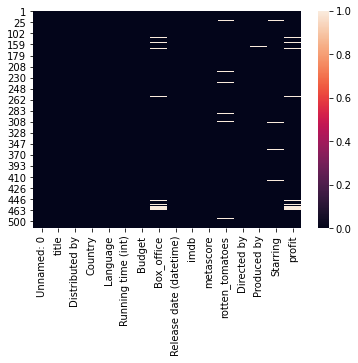

In [594]:
import seaborn as sns
sns.heatmap(movies.isnull())

##### Subtask 2.6: Check Duplicate data

In [598]:
dup_data = movies.duplicated().any
dup_data

<bound method NDFrame._add_numeric_operations.<locals>.any of 1      False
2      False
3      False
5      False
6      False
       ...  
504    False
505    False
507    False
508    False
510    False
Length: 236, dtype: bool>

##### Subtask 2.7: Check the number of retained rows after cleaning

In [550]:
len(movies)/len(OrgData)*100


46.09375

In [551]:
#movies.to_csv("disney_movie_data_finalccc.csv")

#### Task 3: Data Anaysis
##### Subtask 3.1: Change the unit of budget and box office column from $ to million 

In [552]:
movies['Budget (float)'] = movies['Budget (float)']/1000000
movies['Box office (float)'] = movies['Box office (float)']/1000000

In [553]:
movies

,Unnamed: 0,title,Distributed by,Country,Language,Running time (int),Budget (float),Box office (float),Release date (datetime),imdb,metascore,rotten_tomatoes,Directed by,Produced by,Starring
1,1,Snow White and the Seven Dwarfs,RKO Radio Pictures,United States,English,83.0,1.490000,418.000000,21-12-37,7.6,95.0,NaN,"['David Hand', 'William Cottrell', 'Wilfred Ja...",Walt Disney,"['Adriana Caselotti', 'Lucille La Verne', 'Har..."
2,2,Pinocchio,RKO Radio Pictures,United States,English,88.0,2.600000,164.000000,07-02-40,7.4,99.0,100%,"['Ben Sharpsteen', 'Hamilton Luske', 'Bill Rob...",Walt Disney,"['Cliff Edwards', 'Dickie Jones', 'Christian R..."
3,3,Fantasia,RKO Radio Pictures,United States,English,126.0,2.280000,83.300000,13-11-40,7.7,96.0,95%,"['Samuel Armstrong', 'James Algar', 'Bill Robe...","['Walt Disney', 'Ben Sharpsteen']","['Leopold Stokowski', 'Deems Taylor']"
5,5,Dumbo,RKO Radio Pictures,United States,English,64.0,0.950000,1.300000,23-10-41,7.2,96.0,98%,"['Ben Sharpsteen', 'Norman Ferguson', 'Wilfred...",Walt Disney,"['Edward Brophy', 'Verna Felton', 'Cliff Edwar..."
6,6,Bambi,RKO Radio Pictures,United States,English,70.0,0.858000,267.400000,09-08-42,7.3,91.0,90%,"['Supervising director', 'David Hand', 'Sequen...",Walt Disney,see below
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
504,504,The Hunchback of Notre Dame,Buena Vista Pictures,United States,English,91.0,70.000000,325.300000,21-06-96,7.0,74.0,71%,"['Gary Trousdale', 'Kirk Wise']",Don Hahn,"['Tom Hulce', 'Demi Moore', 'Tony Jay', 'Kevin..."
505,505,Inspector Gadget,Buena Vista Pictures Distribution,United States,English,78.0,0.000075,134.400000,23-07-99,4.2,36.0,21%,David Kellogg,"['Roger Birnbaum', 'Andy Heyward', 'Jordan Ker...","['Matthew Broderick', 'Rupert Everett', 'Joely..."
507,507,Robin Hood,Buena Vista Distribution,United States,English,83.0,5.000000,32.000000,08-11-73,6.6,53.0,43%,Wolfgang Reitherman,Wolfgang Reitherman,"['Peter Ustinov', 'Phil Harris', 'Brian Bedfor..."
508,508,SpaceCamp,20th Century Fox,United States,English,107.0,18.000000,9.697739,06-06-86,5.7,40.0,42%,Harry Winer,"['Patrick Bailey', 'Walter Coblenz', 'Leonard ...","['Kate Capshaw', 'Lea Thompson', 'Kelly Presto..."


##### Subtask 3.2: Find the movies with highest profit
###### Here I create new column named profit which contain the difference of the two column box office and budget

In [554]:
movies['profit'] = movies['Box office (float)']-movies['Budget (float)']
movies

,Unnamed: 0,title,Distributed by,Country,Language,Running time (int),Budget (float),Box office (float),Release date (datetime),imdb,metascore,rotten_tomatoes,Directed by,Produced by,Starring,profit
1,1,Snow White and the Seven Dwarfs,RKO Radio Pictures,United States,English,83.0,1.490000,418.000000,21-12-37,7.6,95.0,NaN,"['David Hand', 'William Cottrell', 'Wilfred Ja...",Walt Disney,"['Adriana Caselotti', 'Lucille La Verne', 'Har...",416.510000
2,2,Pinocchio,RKO Radio Pictures,United States,English,88.0,2.600000,164.000000,07-02-40,7.4,99.0,100%,"['Ben Sharpsteen', 'Hamilton Luske', 'Bill Rob...",Walt Disney,"['Cliff Edwards', 'Dickie Jones', 'Christian R...",161.400000
3,3,Fantasia,RKO Radio Pictures,United States,English,126.0,2.280000,83.300000,13-11-40,7.7,96.0,95%,"['Samuel Armstrong', 'James Algar', 'Bill Robe...","['Walt Disney', 'Ben Sharpsteen']","['Leopold Stokowski', 'Deems Taylor']",81.020000
5,5,Dumbo,RKO Radio Pictures,United States,English,64.0,0.950000,1.300000,23-10-41,7.2,96.0,98%,"['Ben Sharpsteen', 'Norman Ferguson', 'Wilfred...",Walt Disney,"['Edward Brophy', 'Verna Felton', 'Cliff Edwar...",0.350000
6,6,Bambi,RKO Radio Pictures,United States,English,70.0,0.858000,267.400000,09-08-42,7.3,91.0,90%,"['Supervising director', 'David Hand', 'Sequen...",Walt Disney,see below,266.542000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
504,504,The Hunchback of Notre Dame,Buena Vista Pictures,United States,English,91.0,70.000000,325.300000,21-06-96,7.0,74.0,71%,"['Gary Trousdale', 'Kirk Wise']",Don Hahn,"['Tom Hulce', 'Demi Moore', 'Tony Jay', 'Kevin...",255.300000
505,505,Inspector Gadget,Buena Vista Pictures Distribution,United States,English,78.0,0.000075,134.400000,23-07-99,4.2,36.0,21%,David Kellogg,"['Roger Birnbaum', 'Andy Heyward', 'Jordan Ker...","['Matthew Broderick', 'Rupert Everett', 'Joely...",134.399925
507,507,Robin Hood,Buena Vista Distribution,United States,English,83.0,5.000000,32.000000,08-11-73,6.6,53.0,43%,Wolfgang Reitherman,Wolfgang Reitherman,"['Peter Ustinov', 'Phil Harris', 'Brian Bedfor...",27.000000
508,508,SpaceCamp,20th Century Fox,United States,English,107.0,18.000000,9.697739,06-06-86,5.7,40.0,42%,Harry Winer,"['Patrick Bailey', 'Walter Coblenz', 'Leonard ...","['Kate Capshaw', 'Lea Thompson', 'Kelly Presto...",-8.302261


In [555]:
movies.sort_values(by='profit', ascending=False)

,Unnamed: 0,title,Distributed by,Country,Language,Running time (int),Budget (float),Box office (float),Release date (datetime),imdb,metascore,rotten_tomatoes,Directed by,Produced by,Starring,profit
451,451,The Lion King,"['Walt Disney Studios', 'Motion Pictures']",United States,English,118.0,0.00025,1657.0,09-07-19,8.5,88.0,93%,Jon Favreau,"['Jon Favreau', 'Jeffrey Silver', 'Karen Gilch...","['Donald Glover', 'Seth Rogen', 'Chiwetel Ejio...",1656.99975
455,455,Frozen II,"['Walt Disney Studios', 'Motion Pictures']",United States,English,104.0,150.00000,1450.0,07-11-19,6.8,64.0,78%,"['Chris Buck', 'Jennifer Lee']",Peter Del Vecho,"['Kristen Bell', 'Idina Menzel', 'Josh Gad', '...",1300.00000
433,433,Beauty and the Beast,"['Walt Disney Studios', 'Motion Pictures']",United States,English,129.0,0.00016,1264.0,23-02-17,8.0,95.0,94%,Bill Condon,"['David Hoberman', 'Todd Lieberman']","['Emma Watson', 'Dan Stevens', 'Luke Evans', '...",1263.99984
401,401,Frozen,"['Walt Disney Studios', 'Motion Pictures']",United States,English,102.0,150.00000,1280.0,19-11-13,7.4,75.0,90%,"['Chris Buck', 'Jennifer Lee']",Peter Del Vecho,"['Kristen Bell', 'Idina Menzel', 'Jonathan Gro...",1130.00000
442,442,Incredibles 2,"['Walt Disney Studios', 'Motion Pictures']",United States,English,118.0,200.00000,1245.0,05-06-18,7.6,80.0,93%,Brad Bird,"['John Walker', 'Nicole Paradis Grindle']","['Craig T. Nelson', 'Holly Hunter', 'Sarah Vow...",1045.00000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
453,453,Lady and the Tramp,Disney+,United States,English,104.0,60.00000,NaN,12-11-19,7.3,78.0,93%,Charlie Bean,Brigham Taylor,"['Tessa Thompson', 'Justin Theroux', 'Kiersey ...",NaN
456,456,Togo,Disney+,United States,English,114.0,40.00000,NaN,20-12-19,8.0,69.0,92%,Ericson Core,Kim Zubick,['Willem Dafoe'],NaN
457,457,Timmy Failure: Mistakes Were Made,Disney+,United States,English,99.0,42.00000,NaN,25-01-20,6.1,60.0,84%,Tom McCarthy,"['Alexander Dostal', 'Tom McCarthy', 'Jim Whit...","['Winslow Fegley', 'Ophelia Lovibond', 'Craig ...",NaN
462,462,Artemis Fowl,Disney+,United States,English,95.0,125.00000,NaN,12-06-20,4.2,31.0,8%,Kenneth Branagh,"['Kenneth Branagh', 'Judy Hofflund']","['Ferdia Shaw', 'Lara McDonnell', 'Josh Gad', ...",NaN


In [556]:
#find out top 10 highest income movies
top10 = movies.sort_values(by='profit', ascending=False).head(10)
top10

,Unnamed: 0,title,Distributed by,Country,Language,Running time (int),Budget (float),Box office (float),Release date (datetime),imdb,metascore,rotten_tomatoes,Directed by,Produced by,Starring,profit
451,451,The Lion King,"['Walt Disney Studios', 'Motion Pictures']",United States,English,118.0,0.000250,1657.0,09-07-19,8.5,88.0,93%,Jon Favreau,"['Jon Favreau', 'Jeffrey Silver', 'Karen Gilch...","['Donald Glover', 'Seth Rogen', 'Chiwetel Ejio...",1656.999750
455,455,Frozen II,"['Walt Disney Studios', 'Motion Pictures']",United States,English,104.0,150.000000,1450.0,07-11-19,6.8,64.0,78%,"['Chris Buck', 'Jennifer Lee']",Peter Del Vecho,"['Kristen Bell', 'Idina Menzel', 'Josh Gad', '...",1300.000000
433,433,Beauty and the Beast,"['Walt Disney Studios', 'Motion Pictures']",United States,English,129.0,0.000160,1264.0,23-02-17,8.0,95.0,94%,Bill Condon,"['David Hoberman', 'Todd Lieberman']","['Emma Watson', 'Dan Stevens', 'Luke Evans', '...",1263.999840
401,401,Frozen,"['Walt Disney Studios', 'Motion Pictures']",United States,English,102.0,150.000000,1280.0,19-11-13,7.4,75.0,90%,"['Chris Buck', 'Jennifer Lee']",Peter Del Vecho,"['Kristen Bell', 'Idina Menzel', 'Jonathan Gro...",1130.000000
442,442,Incredibles 2,"['Walt Disney Studios', 'Motion Pictures']",United States,English,118.0,200.000000,1245.0,05-06-18,7.6,80.0,93%,Brad Bird,"['John Walker', 'Nicole Paradis Grindle']","['Craig T. Nelson', 'Holly Hunter', 'Sarah Vow...",1045.000000
426,426,Finding Dory,"['Walt Disney Studios', 'Motion Pictures']",United States,English,97.0,0.000175,1029.0,08-06-16,7.3,77.0,94%,Andrew Stanton,Lindsey Collins,"['Ellen DeGeneres', 'Albert Brooks', 'Hayden R...",1028.999825
423,423,The Jungle Book,"['Walt Disney Studios', 'Motion Pictures']",United States,English,106.0,0.000175,966.6,04-04-16,7.4,77.0,94%,Jon Favreau,"['Jon Favreau', 'Brigham Taylor']","['Bill Murray', 'Ben Kingsley', 'Idris Elba', ...",966.599825
192,192,The Lion King,Buena Vista Pictures,United States,English,88.0,45.000000,968.5,15-06-94,8.5,88.0,93%,"['Roger Allers', 'Rob Minkoff']",Don Hahn,"['Matthew Broderick', 'Jonathan Taylor Thomas'...",923.500000
422,422,Zootopia,"['Walt Disney Studios', 'Motion Pictures']",United States,English,108.0,150.000000,1024.0,13-02-16,8.0,78.0,98%,"['Byron Howard', 'Rich Moore']",Clark Spencer,"['Ginnifer Goodwin', 'Jason Bateman', 'Idris E...",874.000000
450,450,Toy Story 4,"['Walt Disney Studios', 'Motion Pictures']",United States,English,100.0,200.000000,1073.0,11-06-19,7.7,84.0,97%,Josh Cooley,"['Mark Nielsen', 'Jonas Rivera']","['Tom Hanks', 'Tim Allen', 'Annie Potts', 'Ton...",873.000000


##### Subtask: 3.3: Find IMDB top 50 movies (where meatscore of each movie atleast 50)

In [557]:
imdb_top_50 = movies[movies['metascore'] >= 50].sort_values(by='imdb', ascending=False).head(50)
imdb_top_50


,Unnamed: 0,title,Distributed by,Country,Language,Running time (int),Budget (float),Box office (float),Release date (datetime),imdb,metascore,rotten_tomatoes,Directed by,Produced by,Starring,profit
259,259,Spirited Away,Toho,Japan,Japanese,125.0,0.000015,NaN,20-07-01,8.6,96.0,97%,Hayao Miyazaki,Toshio Suzuki,"['Rumi Hiiragi', 'Miyu Irino', 'Mari Natsuki',...",NaN
451,451,The Lion King,"['Walt Disney Studios', 'Motion Pictures']",United States,English,118.0,0.000250,1657.0,09-07-19,8.5,88.0,93%,Jon Favreau,"['Jon Favreau', 'Jeffrey Silver', 'Karen Gilch...","['Donald Glover', 'Seth Rogen', 'Chiwetel Ejio...",1656.999750
192,192,The Lion King,Buena Vista Pictures,United States,English,88.0,45.000000,968.5,15-06-94,8.5,88.0,93%,"['Roger Allers', 'Rob Minkoff']",Don Hahn,"['Matthew Broderick', 'Jonathan Taylor Thomas'...",923.500000
440,440,Coco,"['Walt Disney Studios', 'Motion Pictures']",United States,English,105.0,0.000175,807.8,20-10-17,8.4,81.0,97%,Lee Unkrich,Darla K. Anderson,"['Anthony Gonzalez', 'Gael García Bernal', 'Be...",807.799825
463,463,Hamilton,Walt Disney Studios Motion Pictures,United States,English,160.0,12.500000,NaN,03-07-20,8.4,90.0,97%,Thomas Kail,"['Thomas Kail', 'Lin-Manuel Miranda', 'Jeffrey...","['Daveed Diggs', 'Renée Elise Goldsberry', 'Jo...",NaN
336,336,WALL-E,Walt Disney Studios Motion Pictures,United States,English,97.0,180.000000,521.3,23-06-08,8.4,95.0,95%,Andrew Stanton,Jim Morris,"['Ben Burtt', 'Elissa Knight', 'Jeff Garlin', ...",341.300000
206,206,Toy Story,Buena Vista Pictures Distribution,United States,English,81.0,30.000000,373.0,19-11-95,8.3,95.0,100%,John Lasseter,"['Bonnie Arnold', 'Ralph Guggenheim']","['Tom Hanks', 'Tim Allen', 'Don Rickles', 'Jim...",343.000000
363,363,Toy Story 3,"['Walt Disney Studios', 'Motion Pictures']",United States,English,103.0,200.000000,1067.0,12-06-10,8.2,92.0,98%,Lee Unkrich,Darla K. Anderson,"['Tom Hanks', 'Tim Allen', 'Joan Cusack', 'Don...",867.000000
350,350,Up,"['Walt Disney Studios', 'Motion Pictures']",United States,English,96.0,175.000000,735.1,13-05-09,8.2,88.0,98%,Pete Docter,Jonas Rivera,"['Ed Asner', 'Christopher Plummer', 'Jordan Na...",560.100000
470,470,Soul,Walt Disney Studios Motion Pictures,United States,English,100.0,150.000000,120.9,11-10-20,8.1,83.0,95%,['Pete Docter'],Dana Murray,"['Jamie Foxx', 'Tina Fey', 'Graham Norton', 'R...",-29.100000


In [558]:
imdb_top_50['Rank'] = imdb_top_50['imdb'].rank(method='first', ascending=False)
imdb_top_50

,Unnamed: 0,title,Distributed by,Country,Language,Running time (int),Budget (float),Box office (float),Release date (datetime),imdb,metascore,rotten_tomatoes,Directed by,Produced by,Starring,profit,Rank
259,259,Spirited Away,Toho,Japan,Japanese,125.0,0.000015,NaN,20-07-01,8.6,96.0,97%,Hayao Miyazaki,Toshio Suzuki,"['Rumi Hiiragi', 'Miyu Irino', 'Mari Natsuki',...",NaN,1.0
451,451,The Lion King,"['Walt Disney Studios', 'Motion Pictures']",United States,English,118.0,0.000250,1657.0,09-07-19,8.5,88.0,93%,Jon Favreau,"['Jon Favreau', 'Jeffrey Silver', 'Karen Gilch...","['Donald Glover', 'Seth Rogen', 'Chiwetel Ejio...",1656.999750,2.0
192,192,The Lion King,Buena Vista Pictures,United States,English,88.0,45.000000,968.5,15-06-94,8.5,88.0,93%,"['Roger Allers', 'Rob Minkoff']",Don Hahn,"['Matthew Broderick', 'Jonathan Taylor Thomas'...",923.500000,3.0
440,440,Coco,"['Walt Disney Studios', 'Motion Pictures']",United States,English,105.0,0.000175,807.8,20-10-17,8.4,81.0,97%,Lee Unkrich,Darla K. Anderson,"['Anthony Gonzalez', 'Gael García Bernal', 'Be...",807.799825,4.0
463,463,Hamilton,Walt Disney Studios Motion Pictures,United States,English,160.0,12.500000,NaN,03-07-20,8.4,90.0,97%,Thomas Kail,"['Thomas Kail', 'Lin-Manuel Miranda', 'Jeffrey...","['Daveed Diggs', 'Renée Elise Goldsberry', 'Jo...",NaN,5.0
336,336,WALL-E,Walt Disney Studios Motion Pictures,United States,English,97.0,180.000000,521.3,23-06-08,8.4,95.0,95%,Andrew Stanton,Jim Morris,"['Ben Burtt', 'Elissa Knight', 'Jeff Garlin', ...",341.300000,6.0
206,206,Toy Story,Buena Vista Pictures Distribution,United States,English,81.0,30.000000,373.0,19-11-95,8.3,95.0,100%,John Lasseter,"['Bonnie Arnold', 'Ralph Guggenheim']","['Tom Hanks', 'Tim Allen', 'Don Rickles', 'Jim...",343.000000,7.0
363,363,Toy Story 3,"['Walt Disney Studios', 'Motion Pictures']",United States,English,103.0,200.000000,1067.0,12-06-10,8.2,92.0,98%,Lee Unkrich,Darla K. Anderson,"['Tom Hanks', 'Tim Allen', 'Joan Cusack', 'Don...",867.000000,8.0
350,350,Up,"['Walt Disney Studios', 'Motion Pictures']",United States,English,96.0,175.000000,735.1,13-05-09,8.2,88.0,98%,Pete Docter,Jonas Rivera,"['Ed Asner', 'Christopher Plummer', 'Jordan Na...",560.100000,9.0
470,470,Soul,Walt Disney Studios Motion Pictures,United States,English,100.0,150.000000,120.9,11-10-20,8.1,83.0,95%,['Pete Docter'],Dana Murray,"['Jamie Foxx', 'Tina Fey', 'Graham Norton', 'R...",-29.100000,10.0


In [559]:
#Movies which language not in English in top 50
imdb_top_50[imdb_top_50['Language'] != 'English']

    

,Unnamed: 0,title,Distributed by,Country,Language,Running time (int),Budget (float),Box office (float),Release date (datetime),imdb,metascore,rotten_tomatoes,Directed by,Produced by,Starring,profit,Rank
259,259,Spirited Away,Toho,Japan,Japanese,125.0,0.000015,NaN,20-07-01,8.6,96.0,97%,Hayao Miyazaki,Toshio Suzuki,"['Rumi Hiiragi', 'Miyu Irino', 'Mari Natsuki',...",NaN,1.0
361,361,Oceans,Pathé Distribution,France,French,104.0,80.000000,82.7,17-10-09,7.8,75.0,80%,"['Jacques Perrin', 'Jacques Cluzaud', '(co-dir...","['Jacques Perrin', 'Romain Legrand', 'Nicolas ...",NaN,2.7,26.0
385,385,Arrietty,Toho,Japan,Japanese,95.0,23.000000,146.0,17-07-10,7.6,80.0,95%,Hiromasa Yonebayashi,Toshio Suzuki,"['Mirai Shida', 'Ryunosuke Kamiki', 'Shinobu O...",123.0,34.0


##### Subtask 3.4: Find the best Directors according to imdb score

In [560]:
#group the dataframe using the director name and find 10 ten directors whom mean imdb score is highest
top10director = movies.groupby('Directed by').imdb.mean().sort_values(ascending=False).head(10)
top10director

Directed by
Hayao Miyazaki                     8.600000
['Roger Allers', 'Rob Minkoff']    8.500000
Thomas Kail                        8.400000
Lee Unkrich                        8.300000
Pete Docter                        8.133333
['Pete Docter']                    8.100000
['Byron Howard', 'Rich Moore']     8.000000
Ericson Core                       8.000000
['John Musker', 'Ron Clements']    8.000000
Bill Condon                        8.000000
Name: imdb, dtype: float64

##### Subtask 3.6: Here find out the actors of top 10 movies according to metascore, imdb, budget, box office

In [561]:
#according to meta score
movies.groupby('Starring').metascore.mean().sort_values(ascending=False).head(10)

Starring
['Cliff Edwards', 'Dickie Jones', 'Christian Rub', 'Walter Catlett', 'Charles Judels', 'Evelyn Venable', 'Frankie Darro']                                                                           99.0
['Colin Farrell', 'Michael Keaton', 'Danny DeVito', 'Eva Green']                                                                                                                                    96.0
['Rumi Hiiragi', 'Miyu Irino', 'Mari Natsuki', 'Takeshi Naito', 'Yasuko Sawaguchi', 'Tsunehiko Kamijō', 'Takehiko Ono', 'Bunta Sugawara']                                                           96.0
['Edward Brophy', 'Verna Felton', 'Cliff Edwards', 'Herman Bing', 'Sterling Holloway', 'Margaret Wright', 'Hall Johnson Choir']                                                                     96.0
['Leopold Stokowski', 'Deems Taylor']                                                                                                                                                      

In [562]:
#according to imdb
movies.groupby('Starring').imdb.mean().sort_values(ascending=False).head(10)


Starring
['Rumi Hiiragi', 'Miyu Irino', 'Mari Natsuki', 'Takeshi Naito', 'Yasuko Sawaguchi', 'Tsunehiko Kamijō', 'Takehiko Ono', 'Bunta Sugawara']                                                                                                                         8.6
['Donald Glover', 'Seth Rogen', 'Chiwetel Ejiofor', 'Alfre Woodard', 'Billy Eichner', 'John Kani', 'John Oliver', 'Beyoncé Knowles-Carter', 'James Earl Jones']                                                                                                   8.5
['Matthew Broderick', 'Jonathan Taylor Thomas', 'James Earl Jones', 'Jeremy Irons', 'Moira Kelly', 'Niketa Calame', 'Ernie Sabella', 'Nathan Lane', 'Robert Guillaume', 'Rowan Atkinson', 'Whoopi Goldberg', 'Cheech Marin', 'Jim Cummings', 'Madge Sinclair']    8.5
['Daveed Diggs', 'Renée Elise Goldsberry', 'Jonathan Groff', 'Christopher Jackson', 'Jasmine Cephas Jones', 'Lin-Manuel Miranda', 'Leslie Odom Jr.', 'Okieriete Onaodowan', 'Anthony Ramos', 'Phillipa Soo'] 

In [575]:
#convert the budget (float) column name 
movies.rename(columns = {"Budget (float)": "Budget"}, inplace=True)

In [582]:
#according to budget
movies.groupby('Starring').Budget.mean().sort_values(ascending=False).head(10)




Starring
['Johnny Depp', 'Penélope Cruz', 'Ian McShane', 'Kevin R. McNally', 'Geoffrey Rush']                                                                                                                                                                                                                                                                                         410.6
['Taylor Kitsch', 'Lynn Collins', 'Samantha Morton', 'Mark Strong', 'Ciarán Hinds', 'Dominic West', 'James Purefoy', 'Willem Dafoe']                                                                                                                                                                                                                                         306.6
['Johnny Depp', 'Orlando Bloom', 'Keira Knightley', 'Stellan Skarsgård', 'Bill Nighy', 'Chow Yun-fat', 'Geoffrey Rush', 'Jack Davenport', 'Kevin R. McNally', 'Jonathan Pryce']                                                                          

In [583]:
#convert the Box office (float)column name 
movies.rename(columns = {"Box office (float)": "Box_office"}, inplace=True)

In [585]:
#according to Box office
movies.groupby('Starring').Box_office.mean().sort_values(ascending=False).head(10)

Starring
['Donald Glover', 'Seth Rogen', 'Chiwetel Ejiofor', 'Alfre Woodard', 'Billy Eichner', 'John Kani', 'John Oliver', 'Beyoncé Knowles-Carter', 'James Earl Jones']                                                                                                                                                                                                              1657.0
['Kristen Bell', 'Idina Menzel', 'Josh Gad', 'Jonathan Groff']                                                                                                                                                                                                                                                                                                               1450.0
['Kristen Bell', 'Idina Menzel', 'Jonathan Groff', 'Josh Gad', 'Santino Fontana']                                                                                                                                                                      

#### Movies which run time greater than 150 minutesm

In [601]:
movies[movies['Running time (int)']>=150]
#movies[movies['Running time (int)']>=150]['title']

,Unnamed: 0,title,Distributed by,Country,Language,Running time (int),Budget,Box_office,Release date (datetime),imdb,metascore,rotten_tomatoes,Directed by,Produced by,Starring,profit
316,316,Pirates of the Caribbean: Dead Man's Chest,Buena Vista Pictures,United States,English,150.0,225.0,1066.0,24-06-06,7.3,53.0,53%,Gore Verbinski,Jerry Bruckheimer,"['Johnny Depp', 'Orlando Bloom', 'Keira Knight...",841.0
325,325,Pirates of the Caribbean: At World's End,Buena Vista Pictures,United States,English,167.0,300.0,960.9,19-05-07,7.1,50.0,44%,Gore Verbinski,Jerry Bruckheimer,"['Johnny Depp', 'Orlando Bloom', 'Keira Knight...",660.9
463,463,Hamilton,Walt Disney Studios Motion Pictures,United States,English,160.0,12.5,NaN,03-07-20,8.4,90.0,97%,Thomas Kail,"['Thomas Kail', 'Lin-Manuel Miranda', 'Jeffrey...","['Daveed Diggs', 'Renée Elise Goldsberry', 'Jo...",NaN


In [651]:
top10_len = movies.nlargest(10, 'Running time (int)')[['title', 'Running time (int)']]\
.set_index('title')

In [652]:
top10_len

,Running time (int)
title,
Pirates of the Caribbean: At World's End,167.0
Hamilton,160.0
Pirates of the Caribbean: Dead Man's Chest,150.0
The Lone Ranger,149.0
Pirates of the Caribbean: The Curse of the Black Pearl,143.0
Mary Poppins,139.0
Pirates of the Caribbean: On Stranger Tides,137.0
Miracle,136.0
Cruella,134.0


<AxesSubplot:xlabel='Running time (int)', ylabel='title'>

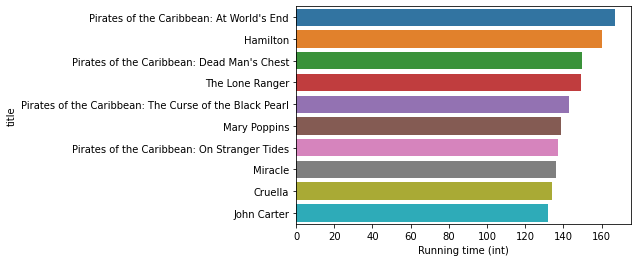

In [655]:
sns.barplot(x='Running time (int)', y=top10_len.index, data=top10_len)

In [653]:
movies.columns


Index(['Unnamed: 0', 'title', 'Distributed by', 'Country', 'Language',
       'Running time (int)', 'Budget', 'Box_office', 'Release date (datetime)',
       'imdb', 'metascore', 'rotten_tomatoes', 'Directed by', 'Produced by',
       'Starring', 'profit'],
      dtype='object')

In [709]:
movies.groupby('Release date (datetime)')['profit'].mean().sort_values(ascending=False).head(15)

Release date (datetime)
09-07-19    1656.999750
07-11-19    1300.000000
23-02-17    1263.999840
19-11-13    1130.000000
05-06-18    1045.000000
08-06-16    1028.999825
04-04-16     966.599825
15-06-94     923.500000
13-02-16     874.000000
11-06-19     873.000000
12-06-10     867.000000
30-05-03     846.300000
24-06-06     841.000000
25-02-10     825.000000
20-10-17     807.799825
Name: profit, dtype: float64

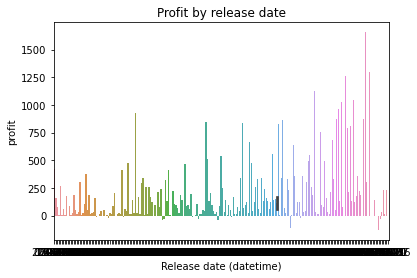

In [636]:
sns.barplot(x='Release date (datetime)', y='profit', data=movies)
plt.title('Profit by release date')
plt.show()

In [710]:
movies.nlargest(10, 'profit')['title']

451           The Lion King
455               Frozen II
433    Beauty and the Beast
401                  Frozen
442           Incredibles 2
426            Finding Dory
423         The Jungle Book
192           The Lion King
422                Zootopia
450             Toy Story 4
Name: title, dtype: object

In [721]:
top_10=movies.nlargest(10, 'profit')[['title', 'profit']].\
set_index('title')
top_10

,profit
title,
The Lion King,1656.999750
Frozen II,1300.000000
Beauty and the Beast,1263.999840
Frozen,1130.000000
Incredibles 2,1045.000000
Finding Dory,1028.999825
The Jungle Book,966.599825
The Lion King,923.500000
Zootopia,874.000000


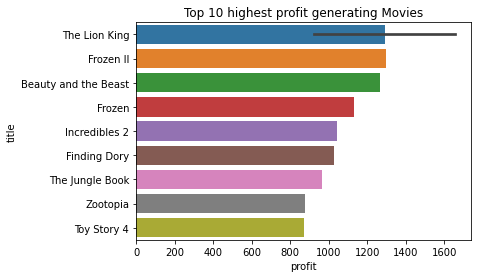

In [723]:
sns.barplot(x='profit', y=top_10.index, data=top_10)
plt.title("Top 10 highest profit generating Movies")
plt.show()

In [693]:
#top10_director = movies.groupby('Directed by')['profit'].mean().sort_values(ascending=False).head(10)
#top10_director

top10_director = movies.nlargest(10, 'metascore')[['title', 'metascore', 'Directed by']]\
.set_index('title')
top10_director

,metascore,Directed by
title,,
Pinocchio,99.0,"['Ben Sharpsteen', 'Hamilton Luske', 'Bill Rob..."
Fantasia,96.0,"['Samuel Armstrong', 'James Algar', 'Bill Robe..."
Dumbo,96.0,"['Ben Sharpsteen', 'Norman Ferguson', 'Wilfred..."
Spirited Away,96.0,Hayao Miyazaki
Ratatouille,96.0,Brad Bird
Dumbo,96.0,Tim Burton
Snow White and the Seven Dwarfs,95.0,"['David Hand', 'William Cottrell', 'Wilfred Ja..."
Beauty and the Beast,95.0,"['Gary Trousdale', 'Kirk Wise']"
Toy Story,95.0,John Lasseter


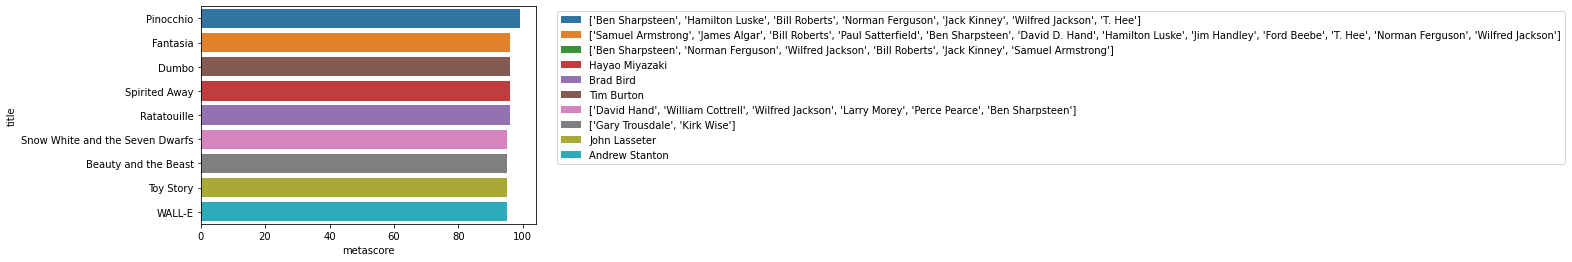

In [706]:
sns.barplot(x='metascore', y=top10_director.index, data=top10_director, hue=top10_director['Directed by'], dodge=False)
plt.legend(bbox_to_anchor=(1.05,1), loc=2)
#plt.title('Profit by Director')
#plt.show()


In [678]:
movies.columns


Index(['Unnamed: 0', 'title', 'Distributed by', 'Country', 'Language',
       'Running time (int)', 'Budget', 'Box_office', 'Release date (datetime)',
       'imdb', 'metascore', 'rotten_tomatoes', 'Directed by', 'Produced by',
       'Starring', 'profit'],
      dtype='object')

In [724]:
#find average imdb rating of movies yearwise
movies.groupby('Release date (datetime)')['imdb'].mean().sort_values(ascending=False)

Release date (datetime)
20-07-01    8.6
15-06-94    8.5
09-07-19    8.5
23-06-08    8.4
20-10-17    8.4
           ... 
21-07-02    4.2
12-06-20    4.2
25-12-97    4.0
03-10-08    3.8
01-02-08    2.6
Name: imdb, Length: 223, dtype: float64

In [725]:
#Does rating Affect the Revenue?
movies.columns    

Index(['Unnamed: 0', 'title', 'Distributed by', 'Country', 'Language',
       'Running time (int)', 'Budget', 'Box_office', 'Release date (datetime)',
       'imdb', 'metascore', 'rotten_tomatoes', 'Directed by', 'Produced by',
       'Starring', 'profit'],
      dtype='object')

<AxesSubplot:xlabel='imdb', ylabel='profit'>

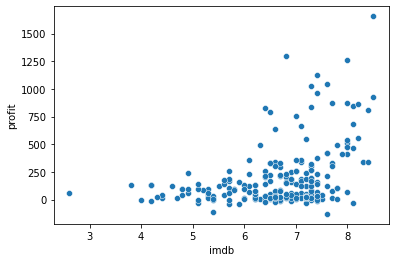

In [726]:
sns.scatterplot(x='imdb', y='profit', data=movies)

In [ ]:
#answer: yes, we can see in the plot that if the imdb rating of the movie is high, and also the profit of those movies are high.

In [727]:
#Classify movies based on rating(excellent, good, average and below average)
movies.columns

Index(['Unnamed: 0', 'title', 'Distributed by', 'Country', 'Language',
       'Running time (int)', 'Budget', 'Box_office', 'Release date (datetime)',
       'imdb', 'metascore', 'rotten_tomatoes', 'Directed by', 'Produced by',
       'Starring', 'profit'],
      dtype='object')

In [731]:
def imdb_rating(rating):
    if rating>=7.0:
        return "Excellent"
    elif rating>=6.0:
        return "Good"
    elif rating>4.0:
        return "Average"
    else:
        return "Below Average"

In [732]:
movies['rating_Cat'] = movies['imdb'].apply(imdb_rating)

In [734]:
movies.head(20)

,Unnamed: 0,title,Distributed by,Country,Language,Running time (int),Budget,Box_office,Release date (datetime),imdb,metascore,rotten_tomatoes,Directed by,Produced by,Starring,profit,rating_Cat
1,1,Snow White and the Seven Dwarfs,RKO Radio Pictures,United States,English,83.0,1.490,418.000,21-12-37,7.6,95.0,NaN,"['David Hand', 'William Cottrell', 'Wilfred Ja...",Walt Disney,"['Adriana Caselotti', 'Lucille La Verne', 'Har...",416.510,Excellent
2,2,Pinocchio,RKO Radio Pictures,United States,English,88.0,2.600,164.000,07-02-40,7.4,99.0,100%,"['Ben Sharpsteen', 'Hamilton Luske', 'Bill Rob...",Walt Disney,"['Cliff Edwards', 'Dickie Jones', 'Christian R...",161.400,Excellent
3,3,Fantasia,RKO Radio Pictures,United States,English,126.0,2.280,83.300,13-11-40,7.7,96.0,95%,"['Samuel Armstrong', 'James Algar', 'Bill Robe...","['Walt Disney', 'Ben Sharpsteen']","['Leopold Stokowski', 'Deems Taylor']",81.020,Excellent
5,5,Dumbo,RKO Radio Pictures,United States,English,64.0,0.950,1.300,23-10-41,7.2,96.0,98%,"['Ben Sharpsteen', 'Norman Ferguson', 'Wilfred...",Walt Disney,"['Edward Brophy', 'Verna Felton', 'Cliff Edwar...",0.350,Excellent
6,6,Bambi,RKO Radio Pictures,United States,English,70.0,0.858,267.400,09-08-42,7.3,91.0,90%,"['Supervising director', 'David Hand', 'Sequen...",Walt Disney,see below,266.542,Excellent
10,10,Make Mine Music,"RKO Radio Pictures, Inc.",United States,English,75.0,1.350,3.275,20-04-46,6.2,60.0,64%,"['Jack Kinney', 'Clyde Geronimi', 'Hamilton Lu...",Walt Disney,Nelson Eddy,1.925,Good
11,11,Song of the South,RKO Radio Pictures,United States,English,94.0,2.125,65.000,12-11-46,7.1,54.0,50%,"['Live action:', 'Harve Foster', 'Animation:',...",Walt Disney,"['James Baskett', 'Bobby Driscoll', 'Luana Pat...",62.875,Excellent
13,13,Melody Time,"RKO Radio Pictures, Inc.",United States,English,75.0,1.500,2.560,27-05-48,6.3,69.0,73%,"['Jack Kinney', 'Clyde Geronimi', 'Hamilton Lu...",Walt Disney,"['Roy Rogers', 'Trigger', 'Dennis Day', 'The A...",1.060,Good
16,16,Cinderella,RKO Radio Pictures,United States,English,74.0,2.200,182.000,15-02-50,6.9,67.0,84%,"['Clyde Geronimi', 'Hamilton Luske', 'Wilfred ...",Walt Disney,"['Ilene Woods', 'Eleanor Audley', 'Verna Felto...",179.800,Good
18,18,Alice in Wonderland,RKO Radio Pictures,United States,English,75.0,3.000,2.400,26-07-51,6.4,53.0,51%,"['Clyde Geronimi', 'Wilfred Jackson', 'Hamilto...",Walt Disney,"['Kathryn Beaumont', 'Ed Wynn', 'Richard Haydn...",-0.600,Good


In [688]:
movies['Release date (datetime)'].value_counts()


25-12-63    2
23-07-99    2
21-06-02    2
21-06-96    2
03-06-01    2
           ..
23-09-07    1
06-05-14    1
12-02-99    1
27-05-48    1
17-11-89    1
Name: Release date (datetime), Length: 223, dtype: int64

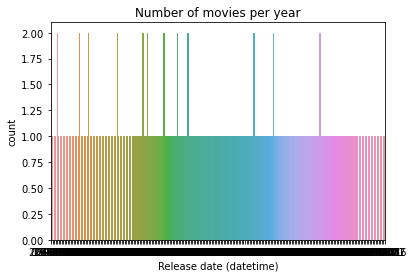

In [691]:
sns.countplot(x='Release date (datetime)', data = movies)
plt.title('Number of movies per year')
plt.show()